ÊñáÊú¨ÂêëÈáèÂåñ

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import jieba
import re
import pandas as pd
import numpy as np


In [2]:
file_path = r"/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/Êï∞ÊçÆ/xiaomi.csv"
df = pd.read_csv(file_path)
df

Áî®Êà∑Âêç                                                 ÂÜÖÂÆπ   ÁÇπËµûÈáè  \
0        SupremeWow                           Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025   
1               ÂèäÁ±≥‰æ†                             ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725   
2           Â∞èÈ∫¶Elite                                          Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020   
3              Á±≥12U                          Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660   
4     Spider_boy666                                               Èõ∑ÊÄªÂä†Áîµ   650   
...             ...                                                ...   ...   
4568          Êò•Â§èÁßãÂÜ¨Êπñ                                              Ê¨¢ËøéÈõ∑ÂÜõüçâ     0   
4569          ÂõõÂ≠£ÁöÑÊöñÁ™ù  Èõ∑ÊÄªÔºåËÉΩ‰∏çËÉΩÂèëÂîÆARE U OKÂ§ßÂ≠óÊØç ËøêÂä®ÂåÖ ËÉΩ‰∏çËÉΩÂºÄMIÂÆ∂HOTELÔºåÁî®SU7Êé•ÈÄÅÂÆ¢‰∫∫Âà∞MIÂÆ∂     0   
4570          Á±≥Á≤âÁé©ËΩ¶Â±Ä  ‰∏≠ÂõΩÂπ≥ÂÆâÁöÑÂπ≥ÂÆâËΩ¶Èô©ÔºåÊú™ÁªèÊú¨‰∫∫ÂÖÅËÆ∏ÔºåÊª•Áî®Êú¨‰∫∫ÂßìÂêç„ÄÅÁîµËØù„ÄÅË∫´‰ªΩËØÅ‰ø°ÊÅØÔºåËøûÁª≠‰∏Ä‰∏™ÊúàËΩ¶Èô©ÂÆ¢ÊúçÁîµËØùÈ™öÊâ∞...     0   
4571      Êµ¶‰∏úÊú∫Âú∫‰∏äÁ©∫ÁöÑËΩ∞È∏£                                     ‰∏çÊÉ≥‰ΩìÈ™å‰Ω†‰ª¨ÁöÑÊúÄÊñ∞ÁßëÊäÄÔºåÈõ∑Âó®     0   
4572      ÈòøÁΩóÂêõÂêõ19759                                             Ê≠åÊâã2024     1   

                       Êó•Êúü  
0     2024-03-30 12:22:53  
1     2024-03-30 12:23:26  
2     2024-03-30 12:22:38  
3     2024-03-30 12:22:39  
4     2024-03-30 12:23:00  
...                   ...  
4568  2024-05-18 19:58:08  
4569  2024-05-18 19:48:31  
4570  2024-05-18 17:45:00  
4571  2024-05-18 17:42:53  
4572  2024-05-18 17:21:05  

[4573 rows x 4 columns]

In [3]:
# Âà†Èô§ 'ÂÜÖÂÆπ' Âàó‰∏≠ÂåÖÂê´Á©∫ÂÄºÁöÑÊâÄÊúâË°å
df = df.dropna()

# Âà†Èô§ÈáçÂ§ç
df = df.drop_duplicates()
df.shape

(3591, 4)

‰∫å„ÄÅÂàÜËØçÔºàjiebaÔºâ& ÂÅúÁî®ËØç

In [5]:

#ÂÆö‰πâÂÅúÁî®ËØçÂàóË°®

stopwords_file = '/Users/pengyitong/Documents/Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê/Êï∞ÊçÆ/stopwords_cn.txt'
stopwords=[]

#ËØªÂèñÂÅúÁî®ËØçÊñá‰ª∂Âπ∂Ê∑ªÂä†Âà∞ÂÅúÁî®ËØçÂàóË°®
with open(stopwords_file,'r', encoding='utf-8') as f:
    for line in f: # ÈÅçÂéÜÊñá‰ª∂‰∏≠ÁöÑÊØè‰∏ÄË°å
        stopwords.append(line.strip())

#ÂàÜËØçÂ§ÑÁêÜÂáΩÊï∞ÔºåÂåÖÊã¨ÂéªÈô§ÂÅúÁî®ËØçÂíåÊ†áÁÇπÁ¨¶Âè∑
def tokenize(text):
    if not isinstance(text, str):
        return np.nan # ËøôË°å‰ª£Á†ÅÊ£ÄÊü•ËæìÂÖ•ÁöÑÊñáÊú¨ÊòØÂê¶ÊòØÂ≠óÁ¨¶‰∏≤Á±ªÂûã
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords and word.strip()] # ÈÇ£‰∫õ‰∏çÂú®ÂÅúÁî®ËØçÂàóË°®‰∏≠‰∏î‰∏ç‰∏∫Á©∫ÁôΩÂ≠óÁ¨¶ÁöÑËØçËØ≠Êâç‰ºöË¢´‰øùÁïô
    filtered_text = '/'.join(filtered_words) #ÂàÜËØç‰πãÈó¥Áî®ÊñúÊù†ÂàÜÈöî
    filtered_text_no_punctuation = re.sub(r'[^\w\s]','', filtered_text)
    filtered_text_no_extra_punctuation = re.sub(r'[\s+\.\!\/_,$%^*(+\"\')]+|[+‚Äî‚Äî()?„Äê„Äë‚Äú‚ÄùÔºÅÔºå„ÄÇÔºü„ÄÅ~@#Ôø•%‚Ä¶‚Ä¶&*ÔºàÔºâ„Ää„ÄãÔºö]+', '', text)
    return filtered_text_no_extra_punctuation.split('/') #ËøîÂõûÂàÜËØçÂêéÁöÑÂàóË°®ÂΩ¢ÂºèÔºåËØç‰πãÈó¥Áî®ÊñúÊù†ÂàÜÈöî
    return filtered_text


df['ÂÜÖÂÆπ'] = df['ÂÜÖÂÆπ'].apply(lambda x: str(x) if pd.notnull(x) else '')
# Ëøô‰∏ÄË°å‰ª£Á†ÅÁöÑ‰ΩúÁî®ÊòØÁ°Æ‰øùreviewÂàó‰∏≠ÁöÑÊØè‰∏™ÂÄºÈÉΩË¢´ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Á±ªÂûãÔºåÂπ∂Â§ÑÁêÜÂèØËÉΩÂ≠òÂú®ÁöÑÁº∫Â§±ÂÄºÔºàNaNÔºâ

# ÂØπÊØè‰∏ÄË°åÊñáÊú¨ËøõË°åÂàÜËØçÂ§ÑÁêÜÔºå‰ΩøÁî® apply ÂáΩÊï∞
df['tokenized_text'] = df['ÂÜÖÂÆπ'].apply(tokenize)


# ÈÅçÂéÜÊï¥Âº†Ë°®Ê†º
words = []
for i,row in df.iterrows():
    word = jieba.cut(row['ÂÜÖÂÆπ'])
    result = ' '.join(word)
    words.append(result)
# print(words)
vect = CountVectorizer()
X = vect.fit_transform(words)
X = X.toarray()

words_bag = vect.vocabulary_

# vect = CountVectorizer()
# X_test = vect.fit_transform(words)
# X_testÊòØËØçÈ¢ëÁü©Èòµ
# print(X_test)
# Êü•ÁúãËØçË¢ã

words_bag

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ln/vtlcjcd5303gxd313xg81ygw0000gn/T/jieba.cache
Loading model cost 0.368 seconds.
Prefix dict has been built successfully.


{'Â∞èÁ±≥': 2914,
 'su7': 365,
 'Âº∫Âäø': 3230,
 'Á†¥Âúà': 5185,
 'ÁÅ´ÁàÜ': 4763,
 'ÊÄªÂæó': 3403,
 'ÊäìÁ¥ß': 3653,
 'ÊèêÈ´ò': 3865,
 '‰∫ßËÉΩ': 1010,
 'ÊÑüËßâ': 3483,
 'ËøôÊ¨°': 6298,
 'ÈªëÁ®ø': 6960,
 '‰∏çÂ§™Â§ö': 678,
 'ÁúãÊù•': 5110,
 'ËΩ¶Âúà': 6141,
 'ËøòÊòØ': 6265,
 'Âπ≤ÂáÄ': 3076,
 '‰∏Ä‰∫õ': 424,
 'ÊâãÊú∫': 3570,
 'ÂõûÂøÜ': 2312,
 'Èõ∑ÊÄª': 6689,
 'ËæõËã¶': 6216,
 'ÊÑüË∞¢ÊÇ®': 3485,
 'Â§ßÂÆ∂': 2509,
 '‰∏ÄËæÜ': 531,
 'dream': 221,
 'car': 203,
 'Èõ∑ÊÄªÂä†': 6696,
 '‰ªäÂ§©': 1077,
 'Êó©‰∏ä': 4113,
 'ÂèëÂ∏É‰ºö': 1992,
 'Â∞§ÂÖ∂': 2934,
 'Ê±ΩËΩ¶': 4550,
 'ÊúÄÂêé': 4216,
 'ÈÇ£‰∏™': 6447,
 'Èû†Ë∫¨': 6787,
 'Ê≥™ÁõÆ': 4629,
 'Áõ∏‰ø°': 5087,
 'ÊÄªÊúâ‰∏ÄÂ§©': 3406,
 'ÂÖ®ÁêÉ': 1412,
 '‰∏ÄÊù°': 491,
 'ÈÅìË∑Ø': 6432,
 'ÁúãÂà∞': 5106,
 'È©∞È™ã': 6877,
 'Ë∫´ÂΩ±': 6121,
 'Âπ¥ËΩª‰∫∫': 3108,
 'ÁâπÂà´': 4863,
 'ÂñúÊ¨¢': 2277,
 'ÂÆö‰Ωç': 2788,
 'ÊàêÂäü': 3492,
 '‰∏∫‰∫Ü': 845,
 'Ê¢¶ÊÉ≥': 4415,
 'Âπ¥ËΩª': 3107,
 '‰∫∫ÈÄ†': 1070,
 'Â§ßÂçñ': 2493,
 '‰ΩìÈ™å': 1218,
 'ÊãâÊª°': 3700,
 'È©æÈ©∂': 6886,
 'Áà±Â•Ω

In [6]:
# Âè™ÁúãËØçÔºå‰∏çÁúãÁºñÂè∑
words_bag2 = vect.get_feature_names_out()
df_wordsfreq = pd.DataFrame(X, columns=words_bag2)
df_wordsfreq

00  001  007  01  03  10  100  1000  1000g  100w  ...  ÈªëÈ©¨  ÈªòËÆ§  ÈºìÂä±  ÈºìËàû  \
0      0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
1      0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
2      0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
3      0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
4      0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
...   ..  ...  ...  ..  ..  ..  ...   ...    ...   ...  ...  ..  ..  ..  ..   
3586   0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
3587   0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
3588   0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
3589   0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   
3590   0    0    0   0   0   0    0     0      0     0  ...   0   0   0   0   

      ÈΩêÂÖ®  ÈæôÂ§¥  ÈæôÊô∂  ÈæôÊπñ  ÈæôÁßëÊäÄ  ÈæôËÖæËôéË∑É  
0      0   0   0   0    0     0  
1      0   0   0   0    0     0  
2      0   0   0   0    0     0  
3      0   0   0   0    0     0  
4      0   0   0   0    0     0  
...   ..  ..  ..  ..  ...   ...  
3586   0   0   0   0    0     0  
3587   0   0   0   0    0     0  
3588   0   0   0   0    0     0  
3589   0   0   0   0    0     0  
3590   0   0   0   0    0     0  

[3591 rows x 6975 columns]

CountVectorizer Âè™ËÄÉËôëËØçÁöÑÂá∫Áé∞Ê¨°Êï∞, TfidfVectorizer ÁîüÊàêÁöÑÁü©ÈòµË°®Á§∫ÊØè‰∏™ËØçÂú®ÊØè‰∏™ÊñáÊ°£‰∏≠ÁöÑ TF-IDF ÊùÉÈáç

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
words = df['tokenized_text'].apply(lambda x: ' '.join(x)).tolist()

df_words = pd.DataFrame(words)
df_words

0
0     Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä
1        ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õ
2                   Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû
3     Èõ∑ÊÄªËæõËã¶‰∫ÜÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDreamcar
4                        Èõ∑ÊÄªÂä†Áîµ
...                       ...
3586                  Á∫¢Á±≥ËøòÂá∫Ê±ΩËΩ¶Âêó
3587              Â∞èÁ±≥fold3‰∏∫Âï•ÈÄ†ÁöÑ
3588                      suv
3589                   Êù•‰∫ÜÊù•‰∫ÜÈõ∑ÊÄª
3590                       Á¨¨‰∏Ä

[3591 rows x 1 columns]

In [8]:
# ÈÄöÁî®ËØçÈ¢ÑÂ§ÑÁêÜ
X = df_words[0].apply(lambda x: ' '.join(jieba.cut(x)))

file_path = r"D:\MINE\Â§ßÊï∞ÊçÆÂàÜÊûêÁªºÂêàÂÆûÈ™å\Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê\Êï∞ÊçÆ\stopwords_cn.txt"

with open(file_path, 'r', encoding = 'utf-8') as f:
    stopwords = [line.strip() for line in f]

words = X.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
words

0       Â∞èÁ±≥ su7 Âº∫Âäø Á†¥Âúà ÁÅ´ÁàÜ Èõ∑ ÊÄªÂæó ÊäìÁ¥ß ÊèêÈ´ò ‰∫ßËÉΩ
1             ÊÑüËßâ ËøôÊ¨° ÈªëÁ®ø ‰∏çÂ§™Â§ö ÁúãÊù• ËΩ¶Âúà Êõ¥ Âπ≤ÂáÄ
2                      Â∞èÁ±≥ ÊâãÊú∫ 1 ‰ª£ ÂõûÂøÜ ÔΩû
3             Èõ∑ÊÄª ËæõËã¶ ÊÑüË∞¢ÊÇ® ÂÅö ‰∏ÄËæÜ Dreamcar
4                               Èõ∑ÊÄªÂä† Áîµ
                    ...              
3586                            Á∫¢Á±≥ Ê±ΩËΩ¶
3587                    Â∞èÁ±≥ fold3 ‰∏∫Âï• ÈÄ†
3588                              suv
3589                              Èõ∑ ÊÄª
3590                               Á¨¨‰∏Ä
Name: 0, Length: 3591, dtype: object

In [9]:
# ÂàùÂßãÂåñTfidfVectorizerÂÆû‰æã
vectorizer = TfidfVectorizer()

# Â∞ÜÊñáÊ°£ËΩ¨Êç¢‰∏∫TF-IDFÂêëÈáèÔºåËΩ¨Êç¢ÂÆåÊàêÂêéÔºåtfidf_matrixÊòØ‰∏Ä‰∏™Á®ÄÁñèÁü©Èòµ
tfidf_matrix = vectorizer.fit_transform(words)

# ÊâìÂç∞ËØçÊ±áË°®
print("ËØçÊ±áË°®Ôºö", vectorizer.get_feature_names_out())


# Ëé∑ÂèñÁâπÂÆöËØçËØ≠ÁöÑÁ¥¢Âºï
word_index = vectorizer. vocabulary_.get('ÁâπÂÆöËØçËØ≠')
# # Â¶ÇÊûúËØ•Á¥¢ÂºïÂ≠òÂú®ÔºåÂàôÊâìÂç∞ÂÖ∂Âú®ÂêÑ‰∏™ÊñáÊ°£‰∏≠ÁöÑTF-IDFÂÄº
if word_index is not None:
    word_tfidf_values = tfidf_matrix[:, word_index].toarray()
    print("ÁâπÂÆöËØçËØ≠ÁöÑTF-IDFÂÄºÔºö", word_tfidf_values)

ËØçÊ±áË°®Ôºö ['00' '001' '007' ... 'ÈæôÊπñ' 'ÈæôÁßëÊäÄ' 'ÈæôËÖæËôéË∑É']


In [10]:

tfidf_df = tfidf_matrix.toarray()
tfidf = pd.DataFrame(tfidf_df, columns = vectorizer.get_feature_names_out())
tfidf

00  001  007  03racing   10  100  1000  1000g  1001  100w  ...   ÈªëÈ©¨  \
0     0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
1     0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
2     0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
3     0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
4     0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
...   ...  ...  ...       ...  ...  ...   ...    ...   ...   ...  ...  ...   
3586  0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
3587  0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
3588  0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
3589  0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   
3590  0.0  0.0  0.0       0.0  0.0  0.0   0.0    0.0   0.0   0.0  ...  0.0   

       ÈªòËÆ§   ÈºìÂä±   ÈºìËàû   ÈΩêÂÖ®   ÈæôÂ§¥   ÈæôÊô∂   ÈæôÊπñ  ÈæôÁßëÊäÄ  ÈæôËÖæËôéË∑É  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  
3586  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3587  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3588  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3589  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3590  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  

[3591 rows x 6912 columns]

In [11]:
# from sklearn.preprocessing import StandardScaler
# X_new = StandardScaler().fit_transform(tfidf)

In [12]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(X_new)
# X_pca= pca.transform(X_new)

In [13]:
# pca.components_

In [14]:
tfidf_matrix

<3591x6912 sparse matrix of type '<class 'numpy.float64'>'
	with 23799 stored elements in Compressed Sparse Row format>

Ëøô‰∏™ TF-IDF Áü©ÈòµÊúâ 4573 Ë°åÂíå 6916 Âàó„ÄÇ
Êúâ 28525 ‰∏™ÈùûÈõ∂ÂÖÉÁ¥†

ËÅöÁ±ª

In [35]:
# KMeans
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=10)
k_data = kms.fit_predict(tfidf)
k_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 9, 1, ..., 8, 9, 9])

In [16]:
words_ary = np.array(words)
words_ary[k_data == 1]

array(['Â∞èÁ±≥ su7 Âº∫Âäø Á†¥Âúà ÁÅ´ÁàÜ Èõ∑ ÊÄªÂæó ÊäìÁ¥ß ÊèêÈ´ò ‰∫ßËÉΩ', 'Âπ¥ËΩª‰∫∫ ÁâπÂà´ ÂñúÊ¨¢ SU7 ÂÆö‰Ωç ÊàêÂäü',
       'ËØïÈ©æ SU7 ÁªìÂêà Èõ∑ÊÄª ËøôÊÆµËØù ‰ºö ÂèëÁé∞ Â∞èÁ±≥ SU7 ‰∫∫Áæ§ ÂÆö‰Ωç Áõ∏ÂΩì Ê∏ÖÊô∞ ÊÇ¶Â∑± Âè∞ËΩ¶ Ê†∏ÂøÉ ‰º†Êí≠ ÂÅöÂà∞ „Äî Êâ¨ÈïøÈÅøÁü≠ „Äï',
       'Èõ∑ÊÄª ÁâπÊñØÊãâ ModelS Â∏¶ FSD ÁªàË∫´ ÂÖçË¥π Ë∂ÖÂÖÖ Êç¢Âè∞ Â∞èÁ±≥ SU7', 'Â∞èÁ±≥ SU7 ‰∏≠ÂõΩ ‰∫∫Ê∞ë Âπ∏Á¶è Ê¢¶ËÄåÈÄ†',
       'Èõ∑ÊÄª ÁâπÊñØÊãâ ÂºÄÊîæ 5 Âπ¥ ÂÖçÊÅØ Â∞èÁ±≥ Âï•Êó∂ÂÄô ÂºÄÊîæ ‰π∞ Â∞èÁ±≥ SU7', 'Â∞èÁ±≥ ÊâãÊú∫Áî®Êà∑', 'Â∞èÁ±≥ su7 ÁàÜÊ±Ç ÂõûÂ§ç',
       'Â∞èÁ±≥ 400 ÂîÆÂêé Á±≥ÂÆ∂ APP ÂîÆÂêé ÁîµËØù ÂÜô ‰∏ÄÂ†Ü ÊñáÂ≠ó ÂèçÈ¶à ‰∏ÄÁÇπÁÇπ ÊïàÊûú Êé®ËØø ÊâØÁöÆ Èõ∑ ÊÄªÂæÆÂçö ‰∏ãÊù• ÁïôË®Ä ËØÑËÆ∫ È∫ªÁÉ¶ Â∞èÁ±≥ ÂéÇÂÆ∂ Â∑•Á®ãÂ∏à ÁúãÂà∞ ÈóÆÈ¢ò ÂèçÈ¶à ‰ª•Âêé Â∞Ü Â∞èÁ±≥ Ê¥óÁ¢óÊú∫ 16 Â•ó P1 Âõ∫‰ª∂ ÂçáÁ∫ßÊàê Â∞èÁ±≥ Ê¥óÁ¢óÊú∫ 15 Â•ó S1 Ëá™‰∏ª ÂÖ≥Èó≠ Ëá™Âä® ÂºÄÈó® ÂäüËÉΩ Ëá™‰∏ª ÈÄâÊã©ÊùÉ ËøòÁªô ÂÆ¢Êà∑ ÈÄâÊã©',
       'Èõ∑ÊÄªÂá∫ su8 su7 Â∑≤Áªè Êª°Ë∂≥ ‰∏ç‰∫Ü', 'ÊîØÊåÅ Â∞èÁ±≥ su7 ÂèØÂê¶ su7 Ê®°Âûã ÂºÄÊîæ Ë¥≠‰π∞',
       '‰π∞ su

In [17]:
# # KMeans(pca)
# from sklearn.cluster import KMeans
# kms = KMeans(n_clusters=10)
# km_pca = kms.fit_predict(X_pca)
# km_pca

In [18]:
# DBSACN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5,min_samples=3)
d_data = dbs.fit_predict(tfidf)
d_data

array([-1, -1, -1, ...,  2,  4, -1], dtype=int64)

In [19]:
# # DBSACN(pca)
# from sklearn.cluster import DBSCAN
# dbs = DBSCAN(eps=0.5,min_samples=3)
# db_pca = dbs.fit_predict(X_pca)
# db_pca

In [20]:
# Â∞ÜËÅöÁ±ªÊ†áÁ≠æÊ∑ªÂä†Âà∞DataFrame‰∏≠
df['DBcluster'] = d_data
# df['DBpcacluster'] = db_pca
df['KMcluster'] = k_data
# df['KMpcacluster'] = km_pca
df.head()

Áî®Êà∑Âêç                         ÂÜÖÂÆπ   ÁÇπËµûÈáè                   Êó•Êúü  \
0     SupremeWow   Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025  2024-03-30 12:22:53   
1            ÂèäÁ±≥‰æ†     ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725  2024-03-30 12:23:26   
2        Â∞èÈ∫¶Elite                  Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020  2024-03-30 12:22:38   
3           Á±≥12U  Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660  2024-03-30 12:22:39   
4  Spider_boy666                       Èõ∑ÊÄªÂä†Áîµ   650  2024-03-30 12:23:00   

              tokenized_text  DBcluster  KMcluster  
0  [Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä]         -1          1  
1     [ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õ]         -1          2  
2                [Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû]         -1          9  
3  [Èõ∑ÊÄªËæõËã¶‰∫ÜÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDreamcar]         -1          4  
4                     [Èõ∑ÊÄªÂä†Áîµ]         -1          2

In [21]:
# ËΩ¨Êç¢ DBcluster Âàó‰∏∫Êï∞ÂÄºÁ±ªÂûã
df['DBcluster'] = pd.to_numeric(df['DBcluster'])

# ÊèêÂèñ DBcluster ÂàóÁöÑÊúÄÈ´òÂÄº
max_cluster_value = df['DBcluster'].max()
max_cluster_value

61

In [22]:
count_negative_1 = df[df['DBcluster'] == -1]
count_negative_1

Áî®Êà∑Âêç                         ÂÜÖÂÆπ   ÁÇπËµûÈáè                   Êó•Êúü  \
0        SupremeWow   Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÔºåÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä  3025  2024-03-30 12:22:53   
1               ÂèäÁ±≥‰æ†     ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÔºåÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õÔºÅ  1725  2024-03-30 12:23:26   
2           Â∞èÈ∫¶Elite                  Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû  1020  2024-03-30 12:22:38   
3              Á±≥12U  Èõ∑ÊÄªËæõËã¶‰∫Ü ÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDream car   660  2024-03-30 12:22:39   
4     Spider_boy666                       Èõ∑ÊÄªÂä†Áîµ   650  2024-03-30 12:23:00   
...             ...                        ...   ...                  ...   
4163        ËØ∑ÈóÆÂÖîÂ≠êÊÄé‰πàÂêÉ                     Â±å‰∏ùÂäùÈÄÄÂ§ÑÁêÜ     0  2024-03-30 12:22:50   
4173          -Êó†ÂøÉÂñµ-       Èõ∑ÊÄªÔºåÊàëmodel 3Áªô‰Ω†‰Ω†su7ÁªôÊàëÂêß     0  2024-03-30 12:22:34   
4174          Êï∞ÊØõÈó≤ËÅäÁ´ô                 ËÆ©ËΩ¶‰∏∫‰∫∫ÊúçÂä°Ë∂äÊù•Ë∂äÂ•Ω     0  2024-03-30 12:22:33   
4182        Â§èÂ§©ÁöÑÂ∞æÂ∑¥_Z               Â∞èÁ±≥fold3‰∏∫Âï•ÈÄ†ÁöÑÔºü     0  2024-03-30 12:22:13   
4187   Áî®Êà∑6702293896                         Á¨¨‰∏Ä     1  2024-03-30 12:21:58   

                 tokenized_text  DBcluster  KMcluster  
0     [Â∞èÁ±≥su7Âº∫ÂäøÁ†¥ÂúàÂ§™ÁÅ´ÁàÜ‰∫ÜÈõ∑ÊÄªÂæóÊäìÁ¥ßÊèêÈ´ò‰∫ßËÉΩÂïä]         -1          1  
1        [ÊÑüËßâËøôÊ¨°ÈªëÁ®ø‰∏çÂ§™Â§öÁúãÊù•ËΩ¶ÂúàËøòÊòØÊõ¥Âπ≤ÂáÄ‰∏Ä‰∫õ]         -1          2  
2                   [Â∞èÁ±≥ÊâãÊú∫1‰ª£ÂõûÂøÜÔΩû]         -1          9  
3     [Èõ∑ÊÄªËæõËã¶‰∫ÜÊÑüË∞¢ÊÇ®‰∏∫Â§ßÂÆ∂ÂÅö‰∫Ü‰∏ÄËæÜDreamcar]         -1          4  
4                        [Èõ∑ÊÄªÂä†Áîµ]         -1          2  
...                         ...        ...        ...  
4163                   [Â±å‰∏ùÂäùÈÄÄÂ§ÑÁêÜ]         -1          2  
4173       [Èõ∑ÊÄªÊàëmodel3Áªô‰Ω†‰Ω†su7ÁªôÊàëÂêß]         -1          3  
4174               [ËÆ©ËΩ¶‰∏∫‰∫∫ÊúçÂä°Ë∂äÊù•Ë∂äÂ•Ω]         -1          2  
4182              [Â∞èÁ±≥fold3‰∏∫Âï•ÈÄ†ÁöÑ]         -1          1  
4187                       [Á¨¨‰∏Ä]         -1          2  

[3115 rows x 7 columns]

In [23]:
# KMeans2
from sklearn.cluster import KMeans
kms2 = KMeans(n_clusters=61)
k2_data = kms2.fit_predict(tfidf)
k2_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([59,  0,  0, ..., 30,  0,  0])

In [24]:
words_ary2 = np.array(words)
words_ary2[k_data == 1]

array(['Â∞èÁ±≥ su7 Âº∫Âäø Á†¥Âúà ÁÅ´ÁàÜ Èõ∑ ÊÄªÂæó ÊäìÁ¥ß ÊèêÈ´ò ‰∫ßËÉΩ', 'Âπ¥ËΩª‰∫∫ ÁâπÂà´ ÂñúÊ¨¢ SU7 ÂÆö‰Ωç ÊàêÂäü',
       'ËØïÈ©æ SU7 ÁªìÂêà Èõ∑ÊÄª ËøôÊÆµËØù ‰ºö ÂèëÁé∞ Â∞èÁ±≥ SU7 ‰∫∫Áæ§ ÂÆö‰Ωç Áõ∏ÂΩì Ê∏ÖÊô∞ ÊÇ¶Â∑± Âè∞ËΩ¶ Ê†∏ÂøÉ ‰º†Êí≠ ÂÅöÂà∞ „Äî Êâ¨ÈïøÈÅøÁü≠ „Äï',
       'Èõ∑ÊÄª ÁâπÊñØÊãâ ModelS Â∏¶ FSD ÁªàË∫´ ÂÖçË¥π Ë∂ÖÂÖÖ Êç¢Âè∞ Â∞èÁ±≥ SU7', 'Â∞èÁ±≥ SU7 ‰∏≠ÂõΩ ‰∫∫Ê∞ë Âπ∏Á¶è Ê¢¶ËÄåÈÄ†',
       'Èõ∑ÊÄª ÁâπÊñØÊãâ ÂºÄÊîæ 5 Âπ¥ ÂÖçÊÅØ Â∞èÁ±≥ Âï•Êó∂ÂÄô ÂºÄÊîæ ‰π∞ Â∞èÁ±≥ SU7', 'Â∞èÁ±≥ ÊâãÊú∫Áî®Êà∑', 'Â∞èÁ±≥ su7 ÁàÜÊ±Ç ÂõûÂ§ç',
       'Â∞èÁ±≥ 400 ÂîÆÂêé Á±≥ÂÆ∂ APP ÂîÆÂêé ÁîµËØù ÂÜô ‰∏ÄÂ†Ü ÊñáÂ≠ó ÂèçÈ¶à ‰∏ÄÁÇπÁÇπ ÊïàÊûú Êé®ËØø ÊâØÁöÆ Èõ∑ ÊÄªÂæÆÂçö ‰∏ãÊù• ÁïôË®Ä ËØÑËÆ∫ È∫ªÁÉ¶ Â∞èÁ±≥ ÂéÇÂÆ∂ Â∑•Á®ãÂ∏à ÁúãÂà∞ ÈóÆÈ¢ò ÂèçÈ¶à ‰ª•Âêé Â∞Ü Â∞èÁ±≥ Ê¥óÁ¢óÊú∫ 16 Â•ó P1 Âõ∫‰ª∂ ÂçáÁ∫ßÊàê Â∞èÁ±≥ Ê¥óÁ¢óÊú∫ 15 Â•ó S1 Ëá™‰∏ª ÂÖ≥Èó≠ Ëá™Âä® ÂºÄÈó® ÂäüËÉΩ Ëá™‰∏ª ÈÄâÊã©ÊùÉ ËøòÁªô ÂÆ¢Êà∑ ÈÄâÊã©',
       'Èõ∑ÊÄªÂá∫ su8 su7 Â∑≤Áªè Êª°Ë∂≥ ‰∏ç‰∫Ü', 'ÊîØÊåÅ Â∞èÁ±≥ su7 ÂèØÂê¶ su7 Ê®°Âûã ÂºÄÊîæ Ë¥≠‰π∞',
       '‰π∞ su

In [25]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # ËÆæÁΩÆ‰∏≠ÊñáÊ†áÁ≠æÁöÑÂ≠ó‰Ωì
# font_path = 'C:\Windows\Fonts\SimHei.ttf' 
# myfont = fm.FontProperties(fname=font_path)

# # ÂàõÂª∫ÁîªÂ∏ÉÂíåÂ≠êÂõæ
# fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# # ÁªòÂà∂Á¨¨‰∏Ä‰∏™Â≠êÂõæÔºàKMclusterÔºâ
# axs[0].scatter(df['ÂÜÖÂÆπ'], df['KMcluster'])
# axs[0].set_xlabel('ËØÑËÆ∫', fontproperties=myfont)  # ËÆæÁΩÆ‰∏≠ÊñáÊ†áÁ≠æ
# axs[0].set_ylabel('Á±ªÂà´ (KMcluster)', fontproperties=myfont)  # ËÆæÁΩÆ‰∏≠ÊñáÊ†áÁ≠æ

# # ÁªòÂà∂Á¨¨‰∫å‰∏™Â≠êÂõæÔºàDBclusterÔºâ
# axs[1].scatter(df['ÂÜÖÂÆπ'], df['DBcluster'], color='orange')  # ‰øÆÊîπÈ¢úËâ≤‰∏∫Ê©ôËâ≤
# axs[1].set_xlabel('ËØÑËÆ∫', fontproperties=myfont)  # ËÆæÁΩÆ‰∏≠ÊñáÊ†áÁ≠æ
# axs[1].set_ylabel('Á±ªÂà´ (DBcluster)', fontproperties=myfont)  # ËÆæÁΩÆ‰∏≠ÊñáÊ†áÁ≠æ

# # Ë∞ÉÊï¥Â≠êÂõæ‰πãÈó¥ÁöÑÈó¥Ë∑ù
# plt.subplots_adjust(wspace=0.3)

# # Â±ïÁ§∫ÂõæÂΩ¢
# plt.show()

In [26]:
# ‰ΩôÂº¶Áõ∏‰ººÂ∫¶
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix)
cosine_similarities

array([[1.        , 0.        , 0.03029992, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03029992, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

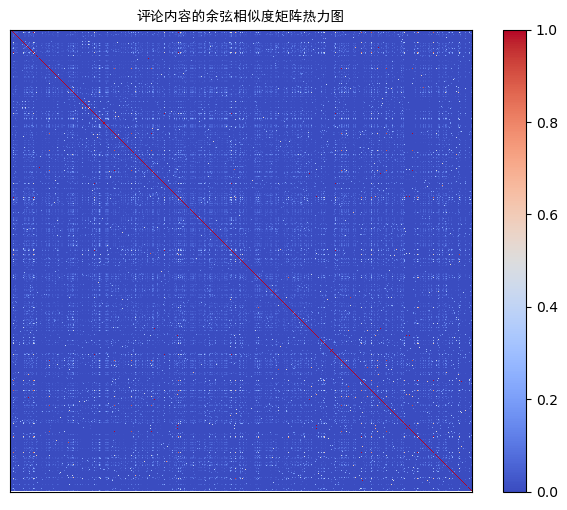

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# ËÆæÁΩÆÂ≠ó‰ΩìÂ±ûÊÄß
font_path = "C:\\Windows\\Fonts\\SimHei.ttf"  # WindowsË∑ØÂæÑ
font_prop = FontProperties(fname=font_path)


# ÂèØËßÜÂåñÁõ∏‰ººÂ∫¶Áü©Èòµ
plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarities, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
plt.title('ËØÑËÆ∫ÂÜÖÂÆπÁöÑ‰ΩôÂº¶Áõ∏‰ººÂ∫¶Áü©ÈòµÁÉ≠ÂäõÂõæ', fontproperties=font_prop)
# ‰∏çÊòæÁ§∫ÂùêÊ†áËΩ¥‰∏äÁöÑÊ†áÁ≠æ
plt.xticks([])
plt.yticks([])

plt.tick_params(axis='both', which='both', length=0)  # ÈöêËóèÂàªÂ∫¶Á∫ø

# ‰øùÂ≠òÂõæË°®
output_path = r'D:\MINE\Â§ßÊï∞ÊçÆÂàÜÊûêÁªºÂêàÂÆûÈ™å\Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê\ÂèØËßÜÂåñ\‰ΩôÂº¶Áõ∏‰ººÂ∫¶ÁÉ≠ÂäõÂõæ.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


kmÁÆóÊ≥ïÂØπ‰ΩôÂº¶Áõ∏‰ººÂ∫¶ÁöÑËÆ°ÁÆóÁªìÊûúËøõË°åËÅöÁ±ªÂàÜÊûê

In [38]:
from sklearn.cluster import KMeans
kms2 = KMeans(n_clusters=10, random_state=123)
k_dataYX= kms2.fit_predict(cosine_similarities)
# k_dataYX = kms2.labels_

k_dataYX

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 1, 2, ..., 3, 1, 1])

In [46]:

# ËÆ°ÁÆó k_data Âíå label ‰∏≠ÊØè‰∏™‰∏çÂêåÊï∞Â≠óÁöÑ‰∏™Êï∞
unique_k, counts_k = np.unique(k_data, return_counts=True)
unique_YX, counts_label = np.unique(k_dataYX, return_counts=True)

# ÂàõÂª∫ pandas DataFrame
df_k_data = pd.DataFrame({'Value': unique_k, 'Frequency': counts_k})
df_YX = pd.DataFrame({'Value': unique_YX, 'Frequency': counts_label})

# ÊâìÂç∞Ë°®Ê†º
print("Ê¨ßÂºèË∑ùÁ¶ª")
print(df_k_data)
print("‰ΩôÂº¶Áõ∏‰ººÂ∫¶")
print(df_YX)

Ê¨ßÂºèË∑ùÁ¶ª
   Value  Frequency
0      0         26
1      1        498
2      2         52
3      3        283
4      4        357
5      5         41
6      6        178
7      7         68
8      8        164
9      9       1924
‰ΩôÂº¶Áõ∏‰ººÂ∫¶
   Value  Frequency
0      0         45
1      1       1996
2      2        473
3      3        151
4      4         26
5      5         62
6      6        553
7      7        218
8      8         40
9      9         27


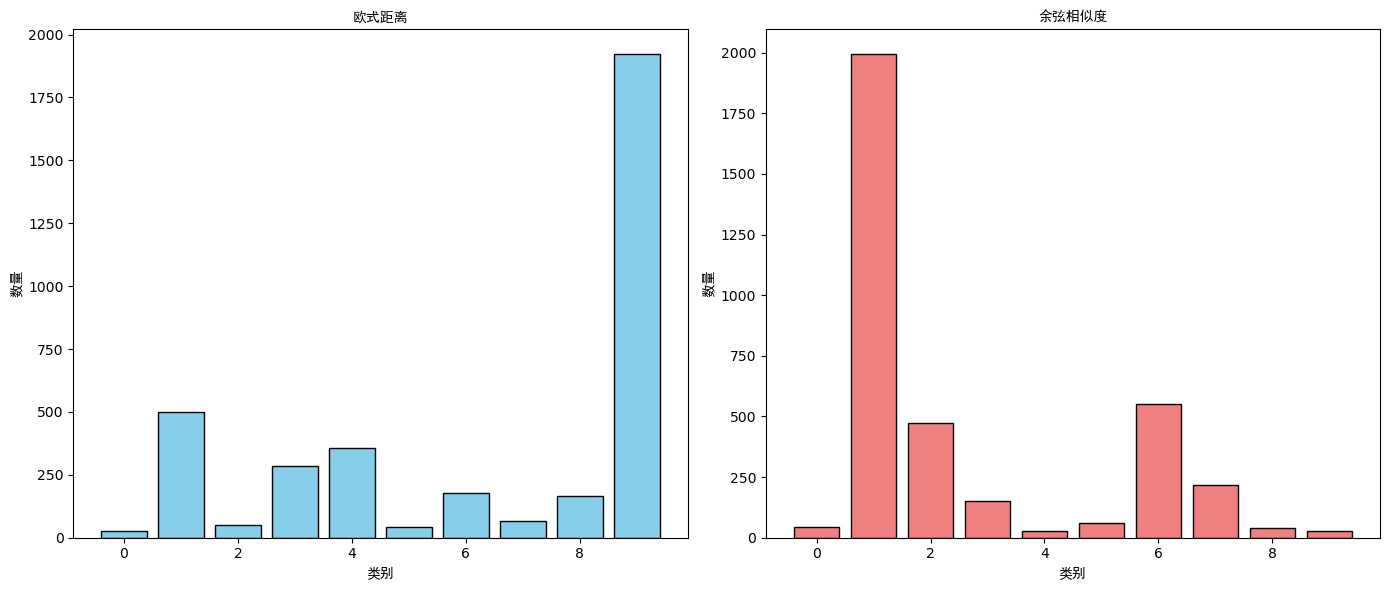

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# ËÆæÁΩÆÂ≠ó‰ΩìÂ±ûÊÄß
font_path = "C:\\Windows\\Fonts\\SimHei.ttf"  # WindowsË∑ØÂæÑ
font_prop = FontProperties(fname=font_path)


# ËÆ°ÁÆó k_data Âíå label ‰∏≠ÊØè‰∏™‰∏çÂêåÊï∞Â≠óÁöÑ‰∏™Êï∞
unique_k, counts_k = np.unique(k_data, return_counts=True)
unique_yx, counts_yx = np.unique(k_dataYX, return_counts=True)

# ÂàõÂª∫Â≠êÂõæ
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ÁªòÂà∂ k_data ÁöÑÊü±Áä∂Âõæ
ax[0].bar(unique_k, counts_k, color='skyblue', edgecolor='black')
ax[0].set_title('Ê¨ßÂºèË∑ùÁ¶ª', fontproperties=font_prop)
ax[0].set_xlabel('Á±ªÂà´', fontproperties=font_prop)
ax[0].set_ylabel('Êï∞Èáè', fontproperties=font_prop)

# ÁªòÂà∂ label ÁöÑÊü±Áä∂Âõæ
ax[1].bar(unique_yx, counts_yx, color='lightcoral', edgecolor='black')
ax[1].set_title('‰ΩôÂº¶Áõ∏‰ººÂ∫¶', fontproperties=font_prop)
ax[1].set_xlabel('Á±ªÂà´', fontproperties=font_prop)
ax[1].set_ylabel('Êï∞Èáè', fontproperties=font_prop)


# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout()

# ‰øùÂ≠òÂõæË°®
output_path = r'D:\MINE\Â§ßÊï∞ÊçÆÂàÜÊûêÁªºÂêàÂÆûÈ™å\Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê\ÂèØËßÜÂåñ\Ê¨ßÂºèË∑ùÁ¶ªvs‰ΩôÂº¶Áõ∏‰ººÂ∫¶.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# ÊòæÁ§∫ÂõæË°®
plt.show()

In [48]:
X1 = cosine_similarities

from sklearn.datasets import make_blobs  
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k: 50
k: 51
k: 52
k: 53
k: 54
k: 55
k: 56
k: 57
k: 58
k: 59


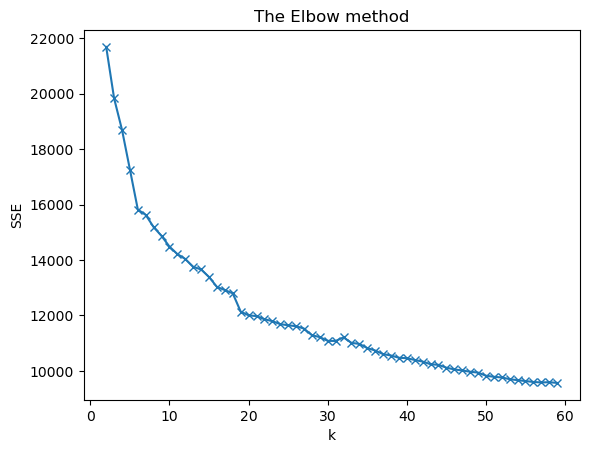

In [50]:
# ÊâãËÇòÊ≥ï

SSE = []
k_min = 2
k_max = 60
for k in range(k_min, k_max):
    print("k:", k)
    kmeans_model = KMeans(n_clusters=k, n_init='auto',random_state=10)
    kmeans_model.fit(X1)
    SSE.append(kmeans_model.inertia_)
# ÁªòÂõæ
plt.figure()
plt.plot(range(k_min, k_max), SSE, marker='x')    
plt.title('The Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

# ‰øùÂ≠òÂõæË°®
output_path = r'D:\MINE\Â§ßÊï∞ÊçÆÂàÜÊûêÁªºÂêàÂÆûÈ™å\Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê\ÂèØËßÜÂåñ\ÊâãËÇòÊ≥ï.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


k: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 16


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 22


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 32


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 34


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 41


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 42


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 47


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 52


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 53


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 59


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


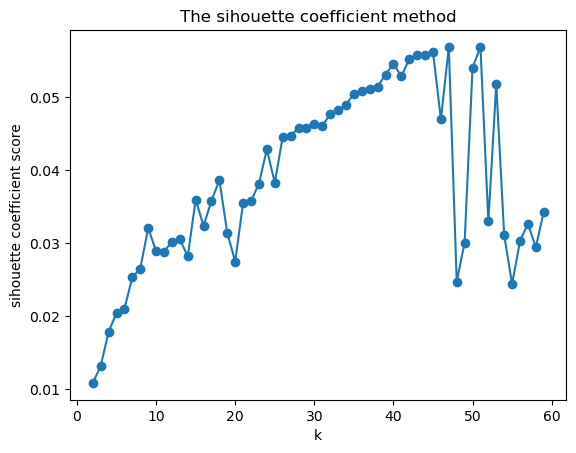

In [51]:
# ËΩÆÂªìÁ≥ªÊï∞Ê≥ïÔºåÁ°ÆÂÆöKÂÄº
SC = []
k_min = 2  # ËΩÆÂªìÁ≥ªÊï∞ÂøÖÈ°ª‰ªé2ÂºÄÂßã
k_max = 60
for k in range(k_min, k_max):
    print("k:", k)
    kmeans_model = KMeans(n_clusters=k, random_state=10)
    kmeans_model.fit(tfidf)
    sc_score  = silhouette_score(tfidf, kmeans_model.labels_)
    SC.append(sc_score)
# ÁªòÂõæ
plt.figure()
plt.plot(range(k_min, k_max), SC, marker='o')    
plt.title('The sihouette coefficient method')
plt.xlabel('k')
plt.ylabel('sihouette coefficient score')

# ‰øùÂ≠òÂõæË°®
output_path = r'D:\MINE\Â§ßÊï∞ÊçÆÂàÜÊûêÁªºÂêàÂÆûÈ™å\Â§ßÊï∞ÊçÆ2102Áè≠_ÂΩ≠ÂºãÊ°ê_Âü∫‰∫éÂ∞èÁ±≥su7ËØÑËÆ∫ÁöÑÊÉÖÊÑüÂàÜÊûêÂíåÊï∞ÊçÆÂàÜÊûê\ÂèØËßÜÂåñ\ËΩÆÂªìÁ≥ªÊï∞Ê≥ï.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

k: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 13


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 14


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 16


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 17


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 19


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 21


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 22


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 23


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 27


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 28


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 29


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 31


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 32


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 34


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 35


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 36


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 37


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 38


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 41


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 42


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 43


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 44


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 45


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 46


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 47


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 48


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 49


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 51


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 52


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 53


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 54


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 55


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 56


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 57


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 59


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


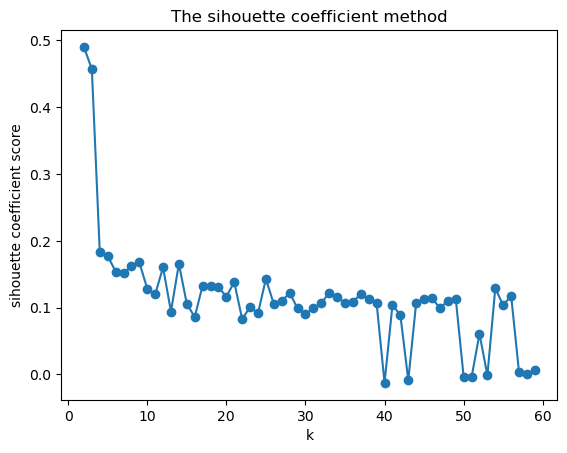

In [49]:
# # ËΩÆÂªìÁ≥ªÊï∞Ê≥ïÁî®‰ΩôÂº¶Áõ∏‰ººÂ∫¶È¢ÑÊµãÔºåÁ°ÆÂÆöKÂÄº
# SC = []
# k_min = 2  # ËΩÆÂªìÁ≥ªÊï∞ÂøÖÈ°ª‰ªé2ÂºÄÂßã
# k_max = 60
# for k in range(k_min, k_max):
#     print("k:", k)
#     kmeans_model = KMeans(n_clusters=k, random_state=10)
#     kmeans_model.fit(cosine_similarities)
#     sc_score  = silhouette_score(cosine_similarities, kmeans_model.labels_)
#     SC.append(sc_score)
# # ÁªòÂõæ
# plt.figure()
# plt.plot(range(k_min, k_max), SC, marker='o')    
# plt.title('The sihouette coefficient method')
# plt.xlabel('k')
# plt.ylabel('sihouette coefficient score')
# plt.show()